<a href="https://colab.research.google.com/github/PRAKASHMS7/Phishing-Detection-By-Using-ML-Models/blob/main/Wrapper_Based_Approach/RECURSIVE_FEATURESipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = '/content/All.csv'
data = pd.read_csv(file_path)

# Replace infinite values with NaN and drop rows with NaN values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# Prepare the feature matrix X and target vector y
X = data.drop(columns='URL_Type_obf_Type')
y = data['URL_Type_obf_Type']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Recursive Feature Elimination (RFE) with RandomForestClassifier to select 40 features
clf = RandomForestClassifier(n_estimators=100, random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=40)

# Fit RFE to the training data
rfe = rfe.fit(X_train, y_train)

# Get the selected features
selected_features_rfe = X_train.columns[rfe.support_]
print("Selected features:", selected_features_rfe.tolist())


Selected features: ['Querylength', 'domain_token_count', 'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld', 'urlLen', 'domainlength', 'pathLength', 'subDirLen', 'fileNameLen', 'pathurlRatio', 'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio', 'argPathRatio', 'NumberofDotsinURL', 'CharacterContinuityRate', 'URL_DigitCount', 'Extension_DigitCount', 'URL_Letter_Count', 'host_letter_count', 'Directory_LetterCount', 'Filename_LetterCount', 'Extension_LetterCount', 'LongestPathTokenLength', 'Domain_LongestWordLength', 'Arguments_LongestWordLength', 'spcharUrl', 'delimeter_path', 'NumberRate_URL', 'NumberRate_Domain', 'NumberRate_FileName', 'NumberRate_Extension', 'SymbolCount_URL', 'SymbolCount_Domain', 'Entropy_Domain', 'Entropy_DirectoryName', 'Entropy_Filename']


Selected features: ['Querylength', 'domain_token_count', 'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld', 'urlLen', 'domainlength', 'pathLength', 'subDirLen', 'fileNameLen', 'pathurlRatio', 'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio', 'argPathRatio', 'NumberofDotsinURL', 'CharacterContinuityRate', 'URL_DigitCount', 'Extension_DigitCount', 'URL_Letter_Count', 'host_letter_count', 'Directory_LetterCount', 'Filename_LetterCount', 'Extension_LetterCount', 'LongestPathTokenLength', 'Domain_LongestWordLength', 'Arguments_LongestWordLength', 'spcharUrl', 'delimeter_path', 'NumberRate_URL', 'NumberRate_Domain', 'NumberRate_FileName', 'NumberRate_Extension', 'SymbolCount_URL', 'SymbolCount_Domain', 'Entropy_Domain', 'Entropy_DirectoryName', 'Entropy_Filename']
Accuracy: 0.9654
Precision: 0.9657
F1 Score: 0.9655
ROC AUC: 0.9977


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


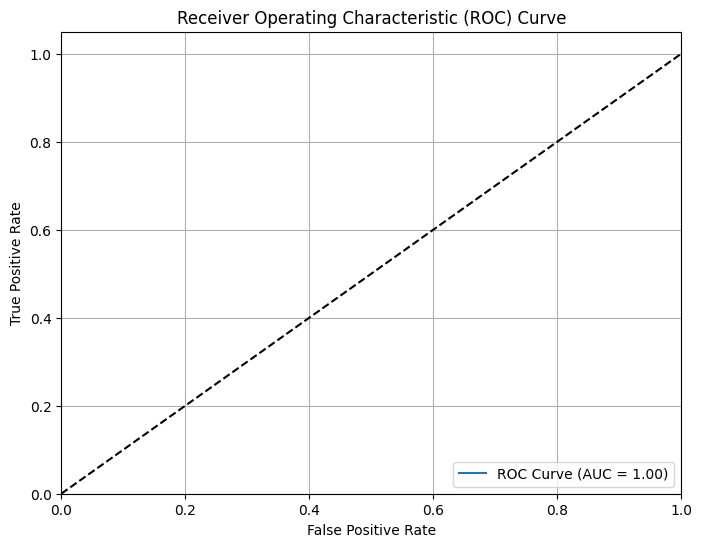

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/All.csv'
data = pd.read_csv(file_path)

# Replace infinite values with NaN and drop rows with NaN values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# Prepare the feature matrix X and target vector y
X = data.drop(columns='URL_Type_obf_Type')
y = data['URL_Type_obf_Type']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Recursive Feature Elimination (RFE) with RandomForestClassifier to select 40 features
clf = RandomForestClassifier(n_estimators=100, random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=40)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features_rfe = X_train.columns[rfe.support_]
print("Selected features:", selected_features_rfe.tolist())

# Create a new dataset with the selected features
X_train_selected = X_train[selected_features_rfe]
X_test_selected = X_test[selected_features_rfe]

# Train the Random Forest Classifier on the selected features
clf.fit(X_train_selected, y_train)

# Make predictions
y_pred = clf.predict(X_test_selected)
y_prob = clf.predict_proba(X_test_selected)  # Get probabilities for all classes

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate ROC AUC for multiclass
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# ROC Curve (for the first class)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1], pos_label=1)  # Adjust pos_label based on your target classes

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
# Take two numbers from the user
a = int(input("Enter first number: "))
b = int(input("Enter second number: "))
# Find the a-th prime number
count = 0
num = 2
while True:
    prime = True
    for i in range(2, num):
        if num % i == 0:
            prime = False
            break
    if prime:
        count += 1
        if count == a:
            prime_a = num
            break
    num += 1

# Find the b-th prime number
count = 0
num = 2
while True:
    prime = True
    for i in range(2, num):
        if num % i == 0:
            prime = False
            break
    if prime:
        count += 1
        if count == b:
            prime_b = num
            break
    num += 1

# Calculate the secret key
secret_key = prime_a * prime_b - 1

# Print the result
print("The secret key is:", secret_key)


Enter first number: 4
Enter second number: 3
The secret key is: 34
